## Import The Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# For exploring audio files
import librosa
import librosa.display
import IPython.display as ipd

import torch
import torchaudio

import warnings
warnings.filterwarnings('ignore')

## READING THE DATA :

In [2]:
meta = pd.read_csv('../data/BirdCLEF2022/train_metadata.csv')
meta.head()

primary_label                secondary_labels                     type  \
0       afrsil1                              []  ['call', 'flight call']   
1       afrsil1  ['houspa', 'redava', 'zebdov']                 ['call']   
2       afrsil1                              []         ['call', 'song']   
3       afrsil1                              []   ['alarm call', 'call']   
4       afrsil1                              []          ['flight call']   

   latitude  longitude  scientific_name         common_name          author  \
0   12.3910    -1.4930  Euodice cantans  African Silverbill       Bram Piot   
1   19.8801  -155.7254  Euodice cantans  African Silverbill        Dan Lane   
2   16.2901   -16.0321  Euodice cantans  African Silverbill       Bram Piot   
3   17.0922    54.2958  Euodice cantans  African Silverbill  Oscar Campbell   
4   21.4581  -157.7252  Euodice cantans  African Silverbill   Ross Gallardy   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
4  Creative Commons Attribution-NonCommercial-Sha...     3.0  16:30   

                                 url              filename  
0  https://www.xeno-canto.org/125458  afrsil1/XC125458.ogg  
1  https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg  
2  https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg  
3  https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg  
4  https://www.xeno-canto.org/207431  afrsil1/XC207431.ogg

 # 
SAMPLE A FEW AUDIOS FROM THE TRAIN SET

In [3]:
base_dir = '../data/BirdCLEF2022/train_audio'
meta['full_path'] = base_dir+ '/' + meta['filename']

In [4]:
birds = ['akikik', 'canvas', 'hawgoo', 'moudov', 'snogoo', 'zebdov']
akikik = meta[meta['primary_label'] == "akikik"].sample(1, random_state = 33)['full_path'].values[0]
canvas = meta[meta['primary_label'] == "canvas"].sample(1, random_state = 33)['full_path'].values[0]
hawgoo = meta[meta['primary_label'] == "hawgoo"].sample(1, random_state = 33)['full_path'].values[0]
moudov = meta[meta['primary_label'] == "moudov"].sample(1, random_state = 33)['full_path'].values[0]
snogoo = meta[meta['primary_label'] == "snogoo"].sample(1, random_state = 33)['full_path'].values[0]
zebdov = meta[meta['primary_label'] == "zebdov"].sample(1, random_state = 33)['full_path'].values[0]

In [5]:
ipd.Audio(akikik)

In [6]:
ipd.Audio(canvas) # Noise 존재

In [7]:
ipd.Audio(hawgoo)

In [8]:
ipd.Audio(moudov)

In [9]:
ipd.Audio(snogoo)

In [10]:
ipd.Audio(zebdov)

 # 
 # 
## Loading and Visualizing an audio file:

In [11]:
y, sr = librosa.load(akikik)

In [12]:
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [-2.9170549e-06 -4.6860714e-06 -7.0086566e-07 ... -3.6029309e-05
 -2.7600798e-04  0.0000000e+00] 

y shape: (1120320,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 50.80816326530612


# 
## TRIM LEADING AND TRAILING SILENCE

In [13]:
audio, _ = librosa.effects.trim(y)

In [14]:
print('Audio File:', audio, '\n')
print('Audio File shape:', np.shape(audio))

Audio File: [-4.5558672e-06  1.7378077e-05  2.2992015e-05 ... -3.6029309e-05
 -2.7600798e-04  0.0000000e+00] 

Audio File shape: (1119808,)


 ### APPLY TO ALL SAMPLES:

In [15]:
y_akikik, sr_akikik = y, sr
audio_akikik = audio

y_canvas, sr_canvas = librosa.load(canvas)
audio_canvas, _ = librosa.effects.trim(y_canvas)

y_hawgoo, sr_hawgoo = librosa.load(hawgoo)
audio_hawgoo, _ = librosa.effects.trim(y_hawgoo)

y_moudov, sr_moudov = librosa.load(moudov)
audio_moudov, _ = librosa.effects.trim(y_moudov)

y_snogoo, sr_snogoo = librosa.load(snogoo)
audio_snogoo, _ = librosa.effects.trim(y_snogoo)

y_zebdov, sr_zebdov = librosa.load(zebdov)
audio_zebdov, _ = librosa.effects.trim(y_zebdov)

# 
## Time Domain Features

 ### Waveform Visualization

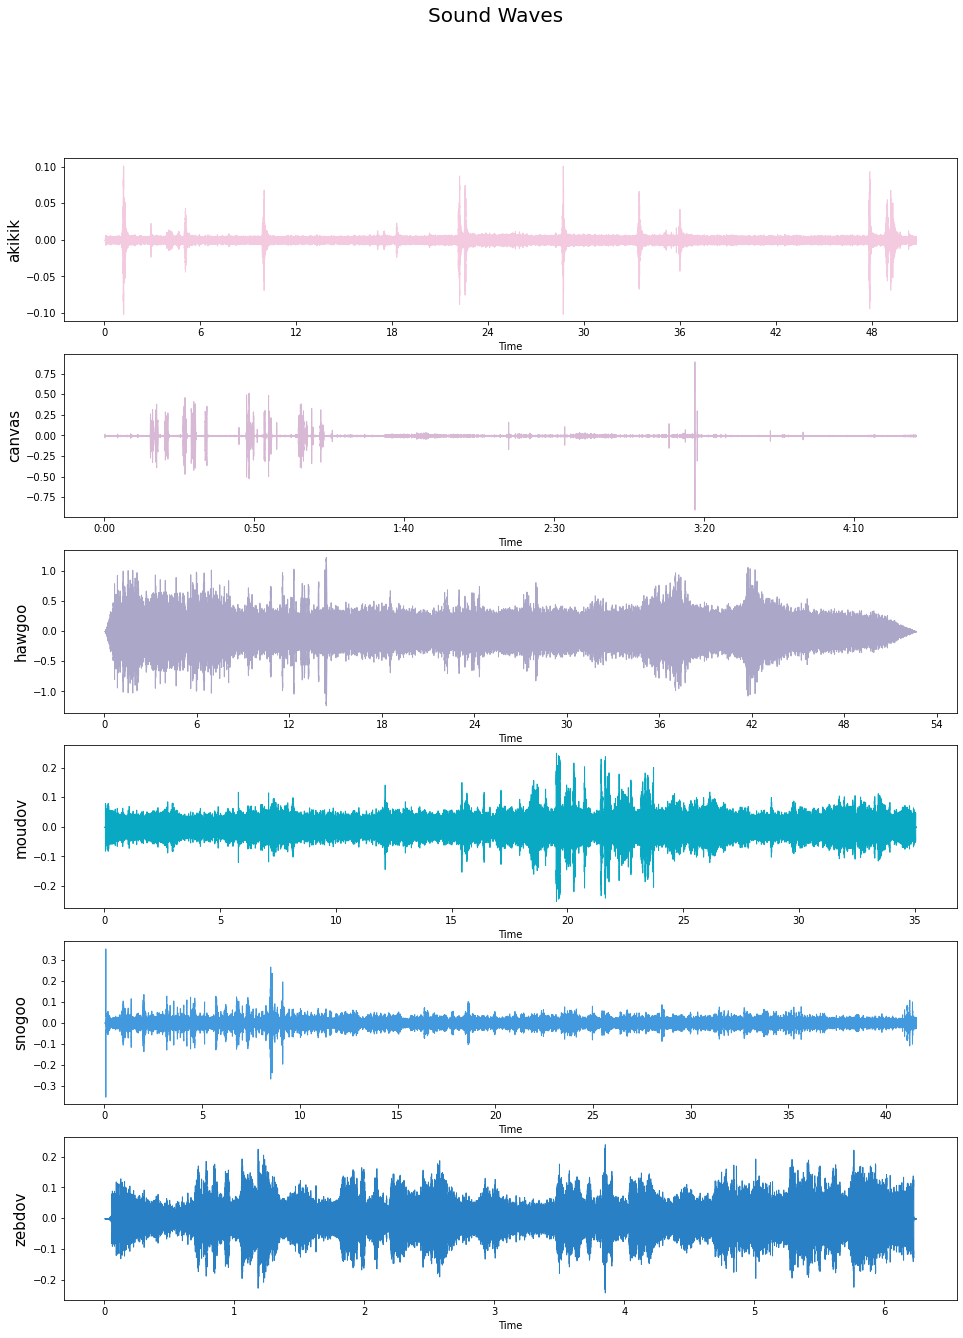

In [16]:
fig, ax = plt.subplots(6, figsize = (16, 21))
fig.suptitle('Sound Waves', fontsize=20)

librosa.display.waveshow(y = audio_akikik, sr = sr_akikik, color = "#F4CAE0", ax=ax[0])
librosa.display.waveshow(y = audio_canvas, sr = sr_canvas, color = "#D7B9D5", ax=ax[1])
librosa.display.waveshow(y = audio_hawgoo, sr = sr_hawgoo, color = "#ABA7C9", ax=ax[2])
librosa.display.waveshow(y = audio_moudov, sr = sr_moudov, color = "#09A8C3", ax=ax[3])
librosa.display.waveshow(y = audio_snogoo, sr = sr_snogoo, color = "#4399DE", ax=ax[4])
librosa.display.waveshow(y = audio_zebdov, sr = sr_zebdov, color = "#2A80C5", ax=ax[5])

for i, name in zip(range(6), birds):
    ax[i].set_ylabel(name, fontsize=15)

 ### SPECTROGRAM

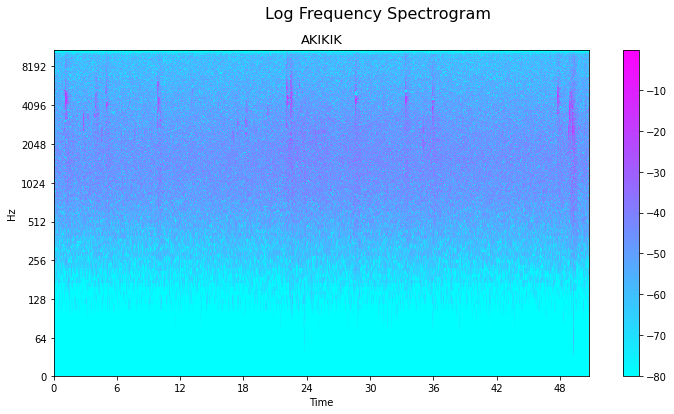

In [17]:
n_fft = 2048
hop_length=512

# Short-time Fourier transform (STFT)
D_akikik = np.abs(librosa.stft(audio_akikik, n_fft=n_fft, hop_length=hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_akikik = librosa.amplitude_to_db(D_akikik, ref = np.max)

# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Log Frequency Spectrogram', fontsize=16)
img = librosa.display.specshow(DB_akikik, sr = sr_akikik, hop_length = hop_length,
                             x_axis = 'time', y_axis = 'log', cmap = 'cool')
ax.set_title('AKIKIK', fontsize=13) 
plt.colorbar(img)

 ### RMSE

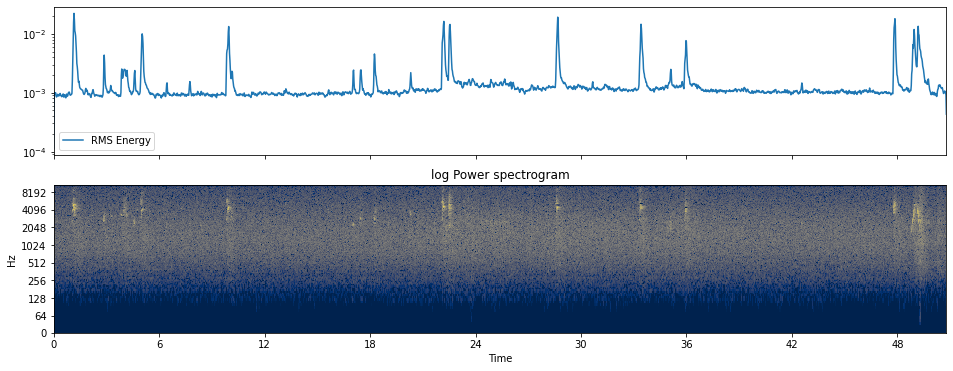

In [18]:
S, phase = librosa.magphase(librosa.stft(audio_akikik))
S_db = librosa.amplitude_to_db(S, ref=np.max)

rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(16, 6))
times = librosa.times_like(rms)

ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(S_db, y_axis='log', x_axis='time', cmap= 'cividis', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

 ### MEL SPECTROGRAM

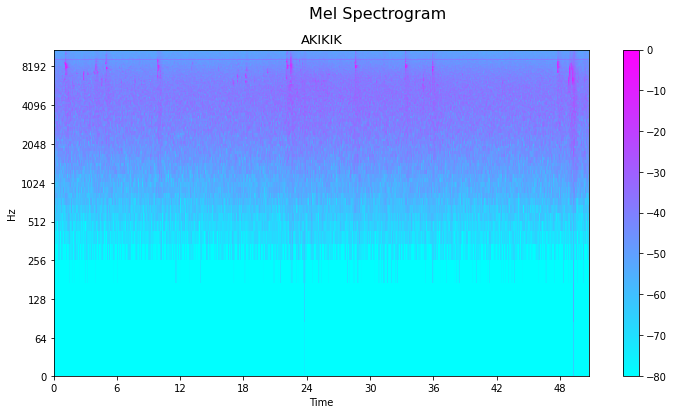

In [19]:
S_akikik = librosa.feature.melspectrogram(audio_akikik, sr=sr_akikik)
S_dB = librosa.power_to_db(S_akikik, ref=np.max)

# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mel Spectrogram', fontsize=16)
img = librosa.display.specshow(S_dB, sr=sr_akikik, hop_length=hop_length,
                               x_axis='time', y_axis='log', cmap='cool')
ax.set_title('AKIKIK', fontsize=13)
plt.colorbar(img)

 ### Zero Crossing Rate ( ZCR )

In [20]:
zero_akikik = librosa.zero_crossings(audio_akikik, pad=False)
zero_canvas = librosa.zero_crossings(audio_canvas, pad=False)
zero_hawgoo = librosa.zero_crossings(audio_hawgoo, pad=False)
zero_moudov = librosa.zero_crossings(audio_moudov, pad=False)
zero_snogoo = librosa.zero_crossings(audio_snogoo, pad=False)
zero_zebdov = librosa.zero_crossings(audio_zebdov, pad=False)
zeroBirds = [zero_akikik, zero_canvas, zero_hawgoo, zero_moudov, zero_snogoo, zero_zebdov]

for bird, name in zip(zeroBirds, birds):
    print(f"ZCR of {name} : {(sum(bird)):,}")

ZCR of akikik : 358,753
ZCR of canvas : 1,425,926
ZCR of hawgoo : 81,747
ZCR of moudov : 134,487
ZCR of snogoo : 199,691
ZCR of zebdov : 36,160


 ### Harmonic-Percussive Source Seperation ( HPSS )

Text(0.5, 1.0, 'Canvas Bird')

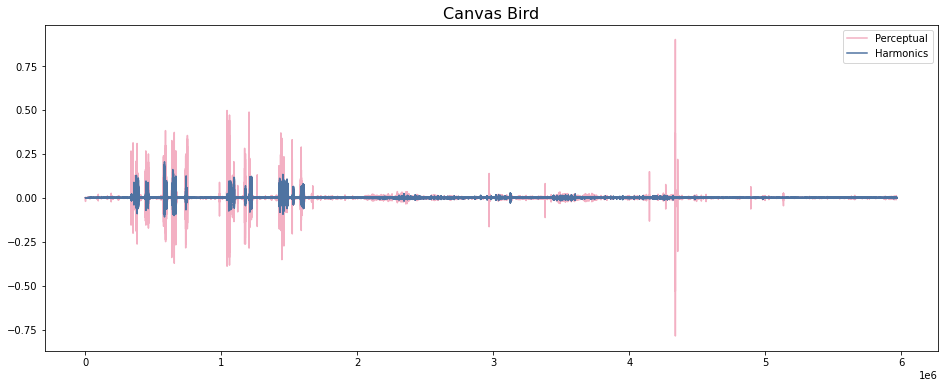

In [21]:
y_harm_canvas, y_perc_canvas = librosa.effects.hpss(audio_canvas)
D_canvas = np.abs(librosa.stft(audio_canvas, n_fft=n_fft, hop_length=hop_length))
DB_canvas = librosa.amplitude_to_db(D_canvas, ref=np.max)

# === PLOT ===
plt.figure(figsize=(16,6))
plt.plot(y_perc_canvas, color="#F3B0C3")
plt.plot(y_harm_canvas, color="#4F73A1")
plt.legend(['Perceptual', 'Harmonics'])
plt.title('Canvas Bird', fontsize=16)

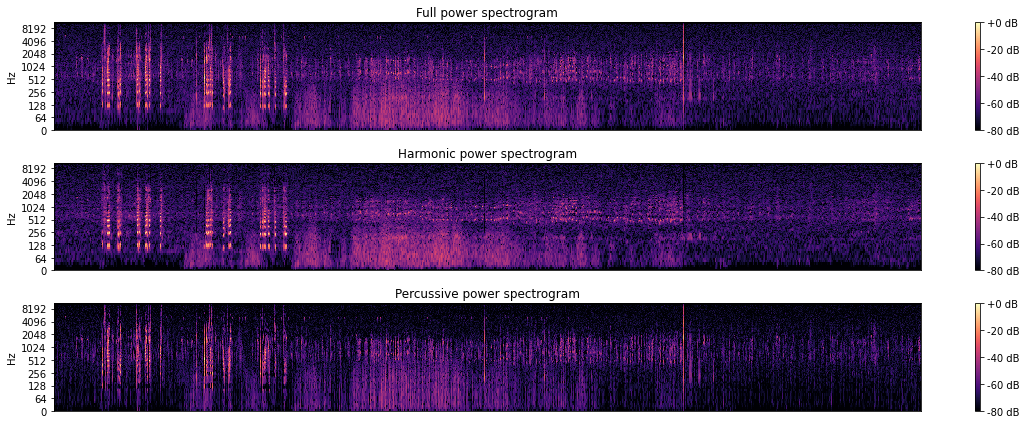

In [22]:
H, P = librosa.decompose.hpss(librosa.stft(audio_canvas))
plt.figure(figsize=(16, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(DB_canvas, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram')

# harmonic spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')

# percussive spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')

plt.tight_layout()
plt.show()